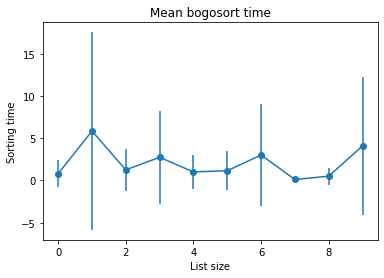

In [1]:
import random
import numpy as np
import time
import matplotlib.pyplot as plt

def is_sorted(lst):
    for i in range(len(lst) - 1):
        if lst[i] > lst[i + 1]:
            return False
    return True

def bogosort(lst):
    while not is_sorted(lst):
        random.shuffle(lst)
    return lst


def bogosort_time(k):  # calculate mean sorting time and standard deviation for list sizes from 0 to k
    mean_times = []
    stdev = []
    list_sizes = list(range(k + 1))
    for size in list_sizes:
        lst = list(range(k + 1))
        timeline = []
        random.shuffle(lst)
        for _ in range(5):
            start = time.perf_counter()
            bogosort(lst)
            end = time.perf_counter()
            timeline.append(end - start)
        mean_time = np.mean(timeline)
        mean_times.append(mean_time)
        dispersion_time = np.std(timeline)
        stdev.append(dispersion_time)
    return mean_times, stdev

k = 9  # it took too long to wait for the bogosort to process a list of size 10 and more, sorry
mean_times, stdev = bogosort_time(k)

fig,ax = plt.subplots()
plt.xlabel('List size')
plt.ylabel('Sorting time')
plt.title('Mean bogosort time')
ax.errorbar(range(k + 1), mean_times, yerr=stdev, fmt='-o')
plt.show()